In [51]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from time import time
import pandas as pd


import sys
sys.path.insert(0, './')

#from plotting import newfig, savefig
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

import operator
import itertools

from sklearn import metrics
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

from sklearn.inspection import permutation_importance

from sklearn import ensemble
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA, KernelPCA, FastICA

from joblib import dump, load
import pickle

import time




Reading file


In [ ]:

# # read flash.dat to a list of lists
datContent = [i.strip().split() for i in open("C:/Users/user/Feature_Selection/data/MT/shear_viscosity_lite.dat").readlines()]

# write it as a new CSV file
# with open("C:/Users/user/Feature_Selection/data/MT/shear_viscosity_lite.csv", "w") as f:
#     writer = csv.writer(f)
#     writer.writerows(datContent)

In [3]:
#write it as a new CSV file
with open("C:/Users/user/Feature_Selection/data/MT/shear_viscosity_lite.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

In [11]:
cols = ["T0","T1", "T2", "T3","TVO2","TVCO","x1","x2","x3","x4","x5","visc"] 

In [12]:
cols = [i for i in range(12)]

In [13]:
df = pd.read_csv("C:/Users/user/Feature_Selection/data/MT/shear_viscosity_lite.csv",sep=',', names=cols, dtype="float32")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,0.2,0.000087
1,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,0.4,0.000088
2,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,0.6,0.000089
3,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,0.8,0.000090
4,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,1.0,0.000090


In [14]:
df.rename(columns={0: "T0",1: "T1",2: "T2",3: "T3",4: "TVO2",5:"TVCO",6:"x1",7:"x2",8:"x3",9:"x4",10:"x5",11:"visc"}, inplace=True)

In [15]:
df


,T0,T1,T2,T3,TVO2,TVCO,x1,x2,x3,x4,x5,visc
0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,0.2,0.000087
1,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,0.4,0.000088
2,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,0.6,0.000089
3,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,0.8,0.000090
4,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.2,0.2,0.2,0.2,1.0,0.000090
...,...,...,...,...,...,...,...,...,...,...,...,...
524283,2500.0,2500.0,7500.0,7500.0,5000.0,10000.0,0.8,1.0,0.4,0.4,0.8,0.000087
524284,2500.0,2500.0,7500.0,7500.0,5000.0,10000.0,0.8,1.0,0.4,0.4,1.0,0.000087
524285,2500.0,2500.0,7500.0,7500.0,5000.0,10000.0,0.8,1.0,0.4,0.6,0.2,0.000087
524286,2500.0,2500.0,7500.0,7500.0,5000.0,10000.0,0.8,1.0,0.4,0.6,0.4,0.000087


Examination

In [ ]:
plt.scatter(x_test_dim[:,1],  y_test_dim[:], s=2, c='k', marker='o', label='Fortran')
plt.scatter(x_test_dim[:,1],  y_regr_dim[:], s=2, c='g', marker='+', label='ExtraTrees')


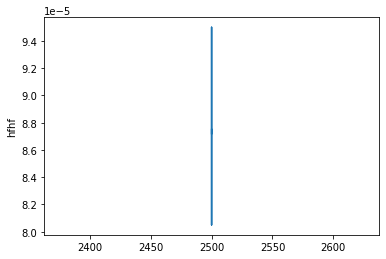

In [47]:

plt.plot( d1,d2 )
plt.ylabel('hfhf')
plt.show()

In [46]:
d1 = df.iloc[:,1 :2]
d2 = df.iloc[:, 11:]

,T0
0,2500.0
1,2500.0
2,2500.0
3,2500.0
4,2500.0
...,...
524283,2500.0
524284,2500.0
524285,2500.0
524286,2500.0


Lasso


In [16]:
X = df.iloc[:, :11].values 
y = df.iloc[:,11:].values  

In [17]:
X.shape

(524288, 11)

In [18]:
y.shape

(524288, 1)

In [20]:
clm=["T0","T1", "T2", "T3","TVO2","TVCO","x1","x2","x3","x4","x5"]

In [19]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

lasso = LassoCV().fit(X, y.ravel())

importance = np.abs(lasso.coef_)

In [26]:

lasso.coef_


array([ 0.0000000e+00,  0.0000000e+00, -1.4210638e-13, -5.9237059e-14,
        1.5358374e-14, -7.8668260e-14, -4.4223925e-06,  7.4304785e-07,
       -3.9958400e-06,  5.1862903e-06,  2.1442008e-06], dtype=float32)

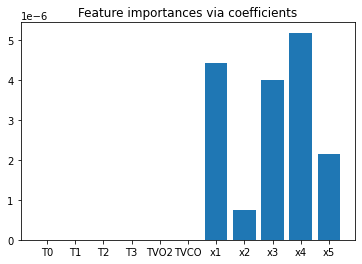

[0.0000000e+00 0.0000000e+00 1.4210638e-13 5.9237059e-14 1.5358374e-14
 7.8668260e-14 4.4223925e-06 7.4304785e-07 3.9958400e-06 5.1862903e-06
 2.1442008e-06]


In [21]:
plt.bar(height=importance, x=clm)
plt.title("Feature importances via coefficients")
plt.show()
print(importance)

In [97]:
l=[0.0000000e+00, 0.0000000e+00, 1.4210638e-13, 5.9237059e-14, 1.5358374e-14,
 7.8668260e-14, 4.4223925e-06, 7.4304785e-07, 3.9958400e-06, 5.1862903e-06,
 2.1442008e-06]

In [98]:
df_l=pd.DataFrame(l, columns=['Lasso'])
print(df_l)

           Lasso
0   0.000000e+00
1   0.000000e+00
2   1.421064e-13
3   5.923706e-14
4   1.535837e-14
5   7.866826e-14
6   4.422392e-06
7   7.430478e-07
8   3.995840e-06
9   5.186290e-06
10  2.144201e-06


In [99]:
Lasso_l= df_l.loc[:].reset_index()
Lasso_l.to_csv('Lasso_shear.csv', index=False)

In [35]:
threshold = np.sort(importance)[-3] + .01 # check/modify these values

tic = time()
sfm = SelectFromModel(estimator=lasso, threshold=threshold).fit(X, y.ravel())
toc = time()
#print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Done in 1.759s


In [32]:
print(sfm.estimator_.coef_)
print(sfm.threshold_)
print(sfm.get_support)
print(sfm.transform(X))

[ 0.0000000e+00  0.0000000e+00 -1.4210638e-13 -5.9237059e-14
  1.5358374e-14 -7.8668260e-14 -4.4223925e-06  7.4304785e-07
 -3.9958400e-06  5.1862903e-06  2.1442008e-06]
0.010003995839961135
<bound method SelectorMixin.get_support of SelectFromModel(estimator=LassoCV(), threshold=0.010003995839961135)>
[]


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


RF 



In [36]:
n_jobs = 2

xB = df.iloc[:, :11] # P, T, x_ci[mol+at]
yB = df.iloc[:,11:]  # shear viscosity
print(xB)
print(yB)
print("x=",xB.shape)
print("y=",yB.shape)


x_train, x_test, y_train, y_test = train_test_split(xB, yB, train_size=0.75, test_size=0.25, random_state=69)

print("x=",x_train.shape)
print("y=",y_train.shape)

 


            T0      T1      T2      T3    TVO2     TVCO   x1   x2   x3   x4  \
0       2500.0  2500.0  2500.0  2500.0  2500.0   2500.0  0.2  0.2  0.2  0.2   
1       2500.0  2500.0  2500.0  2500.0  2500.0   2500.0  0.2  0.2  0.2  0.2   
2       2500.0  2500.0  2500.0  2500.0  2500.0   2500.0  0.2  0.2  0.2  0.2   
3       2500.0  2500.0  2500.0  2500.0  2500.0   2500.0  0.2  0.2  0.2  0.2   
4       2500.0  2500.0  2500.0  2500.0  2500.0   2500.0  0.2  0.2  0.2  0.2   
...        ...     ...     ...     ...     ...      ...  ...  ...  ...  ...   
524283  2500.0  2500.0  7500.0  7500.0  5000.0  10000.0  0.8  1.0  0.4  0.4   
524284  2500.0  2500.0  7500.0  7500.0  5000.0  10000.0  0.8  1.0  0.4  0.4   
524285  2500.0  2500.0  7500.0  7500.0  5000.0  10000.0  0.8  1.0  0.4  0.6   
524286  2500.0  2500.0  7500.0  7500.0  5000.0  10000.0  0.8  1.0  0.4  0.6   
524287  2500.0  2500.0  7500.0  7500.0  5000.0  10000.0  0.8  1.0  0.4  0.6   

         x5  
0       0.2  
1       0.4  
2       0

In [37]:
sc_x = StandardScaler()
sc_y = StandardScaler()

# fit scaler
sc_x.fit(x_train)

# transform training dataset
x_train = sc_x.transform(x_train)

# transform test dataset
x_test = sc_x.transform(x_test)

# fit scaler on training dataset
sc_y.fit(y_train)

# transform training dataset
y_train = sc_y.transform(y_train)

# transform test dataset
y_test = sc_y.transform(y_test)

In [38]:
dump(sc_x, open('scaler_x_shear.pkl', 'wb'))
dump(sc_y, open('scaler_y_shear.pkl', 'wb'))

In [39]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (393216, 11)
Training Labels Shape: (393216, 1)
Testing Features Shape: (131072, 11)
Testing Labels Shape: (131072, 1)


In [40]:
hyper_params = [{
#                 'n_estimators': (1, 50, 100,),
#                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5,),
#                 'max_features': ('auto',),
#                 'max_features': ('sqrt', 'log2', 'auto',),
#                 'bootstrap': (True, False,),
#                 'oob_score': (True, False,),
#                 'warm_start': (True, False,),
#                 'criterion': ('mse', 'mae',),
#                 'max_depth': (1, 10, 100, None,),
#                 'max_leaf_nodes': (2, 100,),
#                 'min_samples_split': (2, 5, 10,),
#                 'min_impurity_decrease': (0.1, 0.2, 0.3, 0.5,),
#                 'min_samples_leaf': (1, 10, 100,),
}]

In [41]:
est=ensemble.RandomForestRegressor()
gs = GridSearchCV(est, cv=2, param_grid=hyper_params, verbose=2, n_jobs=n_jobs, scoring='r2')
#gs = est 

In [52]:
t0 = time.time()
gs.fit(x_train, y_train.ravel())
#gs.fit(x_train, y_train)
runtime = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % runtime)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Complexity and bandwidth selected and model fitted in 111.549291 s


In [53]:
train_score_mse = mean_squared_error(      sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_mae = mean_absolute_error(     sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_evs = explained_variance_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
#train_score_me = max_error(               sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_r2  = r2_score(                sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))

test_score_mse  = mean_squared_error(      sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_mae  = mean_absolute_error(     sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_evs  = explained_variance_score(sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
#test_score_me  = max_error(               sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_r2   = r2_score(                sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))

print()
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(train_score_mae))
print('MSE is {}'.format(train_score_mse))
print('EVS is {}'.format(train_score_evs))
#print('ME is {}'.format(train_score_me))
print('R2 score is {}'.format(train_score_r2))
print()
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(test_score_mae))
print('MSE is {}'.format(test_score_mse))
print('EVS is {}'.format(test_score_evs))
#print('ME is {}'.format(test_score_me))
print('R2 score is {}'.format(test_score_r2))
print()
print("Best parameters set found on development set:")
print(gs.best_params_)
print()



The model performance for training set
--------------------------------------
MAE is 4.6361451812196125e-14
MSE is 4.6975053406554765e-27
EVS is 0.9999999999999992
R2 score is 0.9999999999999992

The model performance for testing set
--------------------------------------
MAE is 4.6346408349509446e-14
MSE is 4.6899034645763025e-27
EVS is 0.9999999999999992
R2 score is 0.9999999999999992

Best parameters set found on development set:
{}



In [54]:
# Re-train with best parameters
regr = ExtraTreesRegressor(**gs.best_params_)
#regr = ExtraTreesRegressor()
# Training
##########
t0 = time.time()
regr.fit(x_train, y_train.ravel())
#regr.fit(x_train, y_train)
regr_fit = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % regr_fit)


Complexity and bandwidth selected and model fitted in 70.974464 s


In [89]:
# perform permutation importance
################################
# https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
results = permutation_importance(regr, x_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.59972
Feature: 7, Score: 0.04086
Feature: 8, Score: 0.49667
Feature: 9, Score: 0.78421
Feature: 10, Score: 0.15038


In [94]:
list=[0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.59972,0.04086,0.78421,0.15038]
df_RF=pd.DataFrame(list, columns=['RF'])
print(df_RF)

        RF
0  0.00000
1  0.00000
2  0.00000
3  0.00000
4  0.00000
5  0.00000
6  0.59972
7  0.04086
8  0.78421
9  0.15038


In [95]:
RFE_shear= df_RF.loc[:].reset_index()
RFE_shear.to_csv('RFE_shear.csv', index=False)

In [90]:
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.59971753, 0.04085888, 0.49666575, 0.78421451,
       0.15037522])

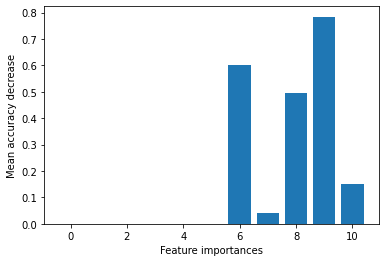

In [91]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.ylabel('Mean accuracy decrease')
plt.xlabel('Feature importances')
plt.savefig("C:/Users/user/Feature_Selection/data/MT/shear_importance_new.pdf", dpi=150)
plt.show()
plt.close()

In [92]:
print("importances_mea = ", results.importances_mean)
print("importances_std = ", results.importances_std)

importances_mea =  [0.         0.         0.         0.         0.         0.
 0.59971753 0.04085888 0.49666575 0.78421451 0.15037522]
importances_std =  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.70044296e-03 8.08859589e-05
 9.31934145e-04 9.96326621e-04 1.78353204e-04]


In [57]:
# Principal Component Analysis (PCA)
####################################
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
#pca = PCA(n_components=2, svd_solver='full')
# pca = PCA(n_components=2, svd_solver='arpack')
pca = PCA(n_components=None)
pca.fit(x_train)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.singular_values_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Eigenvalues:
[6.9608081e+02 6.3128101e+02 6.2809937e+02 6.2773956e+02 6.2744598e+02
 6.2685126e+02 6.2653430e+02 6.2572437e+02 5.4463477e+02 3.5987588e-05
 0.0000000e+00]

Variances (Percentage):
[1.36913292e+01 1.12608648e+01 1.11476415e+01 1.11348738e+01
 1.11244611e+01 1.11033822e+01 1.10921562e+01 1.10634966e+01
 8.38179456e+00 3.65958464e-14 0.00000000e+00]



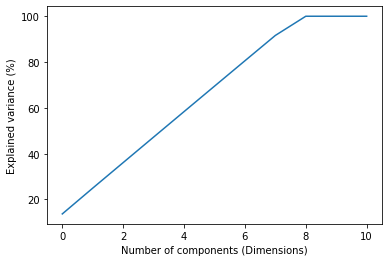

In [58]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.savefig("C:/Users/user/Feature_Selection/data/MT/shear_pca_new.pdf", dpi=150)
plt.show()
plt.close()

In [59]:
t0 = time.time()
y_regr = regr.predict(x_test)
regr_predict = time.time() - t0
print("Prediction for %d inputs in %.6f s" % (x_test.shape[0], regr_predict))


Prediction for 131072 inputs in 1.683016 s


In [60]:
x_test_dim = sc_x.inverse_transform(x_test)
y_test_dim = sc_y.inverse_transform(y_test)
y_regr_dim = sc_y.inverse_transform(y_regr)

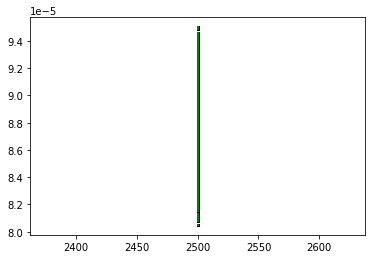

In [61]:
# temperature
plt.scatter(x_test_dim[:,1],  y_test_dim[:], s=2, c='k', marker='o', label='Fortran')
plt.scatter(x_test_dim[:,1],  y_regr_dim[:], s=2, c='g', marker='+', label='ExtraTrees')


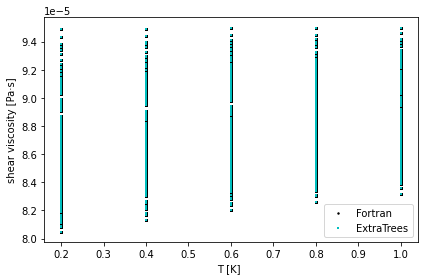

In [62]:
# molar fractions
plt.scatter(x_test_dim[:,10], y_test_dim[:], s=2, c='k', marker='o', label='Fortran')
plt.scatter(x_test_dim[:,10], y_regr_dim[:], s=2, c='c', marker='+', label='ExtraTrees')
# plt.scatter(x_test_dim[:,20], y_test_dim[:], s=2, c='y', marker='o', label='Fortran')
# plt.scatter(x_test_dim[:,20], y_regr_dim[:], s=2, c='g', marker='+', label='ExtraTrees')
# plt.scatter(x_test_dim[:,30], y_test_dim[:], s=2, c='k', marker='o', label='Fortran')
# plt.scatter(x_test_dim[:,30], y_regr_dim[:], s=2, c='m', marker='+', label='ExtraTrees')
plt.ylabel('shear viscosity [Pa·s]')
plt.xlabel('T [K] ')  #molar fractions
plt.legend()
plt.tight_layout()
plt.savefig("C:/Users/user/Feature_Selection/data/MT/shear_new.pdf", dpi=150)
plt.show()
plt.close()

L1

In [63]:
X1 = df.iloc[:,0:11].values   
y1 = df.iloc[:,11:].values 

In [67]:
y1.shape

(524288, 1)

In [65]:
feature_names =["T0","T1", "T2", "T3","TVO2","TVCO","x1","x2","x3","x4","x5","visc"]

In [66]:
list1 = list(feature_names)

In [68]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.75, test_size=0.25, random_state=69)

In [69]:
print("x=",x1_train.shape)
print("y=",y1_train.shape)

x= (393216, 11)
y= (393216, 1)


In [70]:
est = ExtraTreesRegressor(n_estimators=50)
est = est.fit(x1_train,y1_train.ravel())

In [72]:
print(est.feature_importances_)

[0.00000000e+00 0.00000000e+00 2.48876039e-13 2.74777696e-13
 2.59012305e-13 2.67386956e-13 2.85764777e-01 2.02996274e-02
 2.40544822e-01 3.79509020e-01 7.38817543e-02]


In [73]:
model = SelectFromModel(est, prefit=True)
X_new = model.transform(X1)
print(X_new.shape)

(524288, 3)


In [71]:
start_time = time.time()
importances = est.feature_importances_
# Feature importance based on mean decrease in impurity
std = np.std([tree.feature_importances_ for tree in est.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


In [76]:
v = list1[0:11:1]
forest_importances = pd.Series(importances, index=v)

In [78]:
df3=pd.DataFrame(forest_importances, columns=['SelectFromModel'])
df3

,SelectFromModel
T0,0.000000e+00
T1,0.000000e+00
T2,2.488760e-13
T3,2.747777e-13
TVO2,2.590123e-13
TVCO,2.673870e-13
x1,2.857648e-01
x2,2.029963e-02
x3,2.405448e-01
x4,3.795090e-01


In [79]:
SelectFromModel_N2N= df3.loc[:].reset_index()
SelectFromModel_N2N.to_csv('SelectFromModel.csv', index=False)

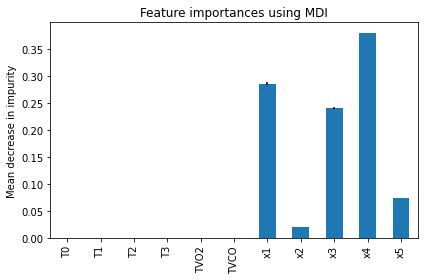

In [80]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [81]:
importances

array([0.00000000e+00, 0.00000000e+00, 2.48876039e-13, 2.74777696e-13,
       2.59012305e-13, 2.67386956e-13, 2.85764777e-01, 2.02996274e-02,
       2.40544822e-01, 3.79509020e-01, 7.38817543e-02])

In [82]:
start_time = time.time()
result = permutation_importance(
    est, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 40.113 seconds


In [83]:
forest_importances = pd.Series(result.importances_mean, index=v)

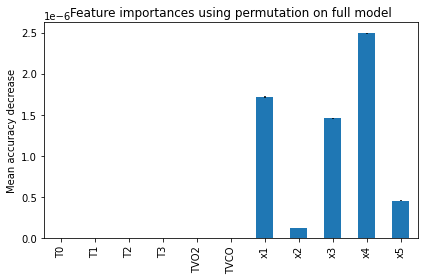

In [84]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()